# Проект 2. Разведывательный анализ данных

## Часть 1. Первичная обработка данных

Задание: Провести разведывательный анализ данных. Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявить студентов, находящихся в группе риска.

Импортируем необходимые бибилиотеки

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [463]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

students=pd.read_csv('stud_math.csv')


Рассмотрим, какие данные хранятся в файле, какие типы данных у столбцов.

In [464]:
print(students.tail(10))
students.info()
students.columns

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
385     MS   F   18       R     GT3       T   2.0   2.0   at_home     other   
386     MS   F   18       R     GT3       T   4.0   4.0   teacher   at_home   
387     MS   F   19       R     GT3       T   2.0   3.0  services     other   
388     MS   F   18       U     LE3       T   3.0   1.0   teacher  services   
389     MS   F   18       U     GT3       T   1.0   1.0     other     other   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
385       other      NaN         NaN        3.0     

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Видим, что в датасете всего 395 студентов. Можно заметить, что в датасете находится столбец, 'studytime, granular', который в описании задания не фигурирует, возможно потому, что у студентов учебное время одинаковое, а уже сколько непосредственно в учебном заведении времени на учебу потратили студенты можно понять из столбца 'absences'. Поэтому удалим столбец 'studytime, granular'.

In [465]:
students.drop(['studytime, granular'], inplace=True,axis=1)

In [466]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

Столбец успешно удален.

Данных в датасете много. Для удобства, те операции, которые необходимо повторять для различных столбцов, будут описаны функциями. Используемые функции представлены ниже.

## Используемые функции

In [580]:
def counts(columns):
    print(pd.DataFrame(students[columns].value_counts()))
    
def histogr(columns):
    students[columns].hist()
    
def describe(columns):
    print(students[columns].describe())
    
def replace_None(columns):
    students[columns]=students[columns].astype(str).apply(lambda x: None if x.strip()=='' else x)
    
def replace_value(columns, val1, val2):
    students[columns] = students[columns].replace(val1, val2)
    
def nan_None(columns):
    students[columns]=students[columns].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
    
def information(columns):
    print(students.loc[:,[columns]].info())
    
def del_None(columns):
    students[columns]=students[~students[columns].isnull()]
    
def None_Mode(columns):
    students[columns]=students[columns].apply(lambda x: students[columns].mode()[0] if pd.isna(x) else x)
 
def to_numeric(columns):
    s = pd.Series(students[columns])
    pd.to_numeric(s)
    students[columns] = pd.to_numeric(students[columns])

def delete_columns(columns):
    students.drop([columns], axis='columns', inplace=True)


## Рассмотрим каждый столбец по отдельности

### school

Рассмотрим параметр 'school'. Параметр не числовой. Посмотрим, сколько школ содержит датасет.

In [468]:
for col in ['school']:
    counts(col)

    school
GP     349
MS      46


В датасете представлено 2 школы. Пустых значений нет

### sex

Рассмотрим столбец 'sex' - пол студента. Это также не числовой параметр, посмотрим есть ли ошибки в данных и пропуски.

In [469]:
for col in ['sex']:
    counts(col)

   sex
F  208
M  187


Ошибок и пустых значений в данном столбце нет

### age

Рассмотрим параметр 'age'. Параметр числовой, поэтому для начала рассмотрим распределение этого признака.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


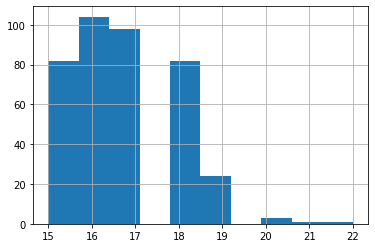

In [470]:
for col in ['age']:
    histogr(col)
for col in ['age']:
    describe(col)

Видно, что данное распределение находится в допустимых пределах, средний возраст студентов 16-17 лет. Пустых значений в столбце нет.

### address

Теперь рассмотрим параметр 'address'.

In [471]:
for col in ['address']:
    counts(col)


   address
U      295
R       83


Видно, что основная чвсть студентов живут в городе. Ошибок в данном столбце нет, но есть пустые значения. Для начала заменим все пустые значения на None.

In [472]:
for col in ['address']:
    replace_None(col)
    nan_None(col)

Пока оставим пустые значения в таком виде, так как неизвестно, сколько пропущенных значений имеет данный датасет, и непонятно, стоит ли удалять эти значения, или нужно чем-то заменить.

### famsize

Рассмотрим, имеет ли столбец ошибки или пустые значения.

In [473]:
for col in ['famsize']:
    counts(col)

     famsize
GT3      261
LE3      107


Ошибок нет. Основная часть студентов живут в многодетных семьях. Имеются пустые значения. Заменим их на None.

In [474]:
for col in ['famsize']:
    replace_None(col)
    nan_None(col)

### Pstatus

Рассмотрим, имеет ли столбец ошибки или пустые значения.

In [475]:
for col in ['Pstatus']:
    counts(col)
    information(col)


   Pstatus
T      314
A       36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


Ошибок нет, есть пустые значения. Заменим их на None. Основная часть студентов живут в полной семье.

In [476]:
for col in ['Pstatus']:
    replace_None(col)
    nan_None(col)
    
students.Pstatus

0         A
1      None
2         T
3         T
4         T
       ... 
390       A
391       T
392       T
393       T
394       T
Name: Pstatus, Length: 395, dtype: object

### Medu

Рассмотрим, имеет ли столбец ошибки или пустые значения.

In [477]:
for col in ['Medu']:
    counts(col)
    information(col)
    

     Medu
4.0   131
2.0   102
3.0    97
1.0    59
0.0     3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None


Ошибок нет, есть пропуски. Заменим их на None. Также nan заменим на None

In [478]:
for col in ['Medu']:
    replace_None(col)
    nan_None(col)
    counts(col)


     Medu
4.0   131
2.0   102
3.0    97
1.0    59
0.0     3


### Fedu

Рассмотрим, имеет ли столбец ошибки или пустые значения.

In [479]:
for col in ['Fedu']:
    counts(col)
    information(col)

      Fedu
2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
40.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None


В столбце имеется ошибка.Скорее всего произошла опечатка, и значение 40 должно быть значением 4. Заменим его.

In [480]:
for col in ['Fedu']:
    replace_value(col, 40.0, 4.0)
    
for col in ['Fedu']:
    counts(col)

     Fedu
2.0   106
3.0    96
4.0    89
1.0    78
0.0     2


Заменим nan на None.Также имеются пустые значения.Заменим их на None

In [481]:
for col in ['Fedu']:
    replace_None(col)
    nan_None(col)
    counts(col)

     Fedu
2.0   106
3.0    96
4.0    89
1.0    78
0.0     2


### Mjob

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object


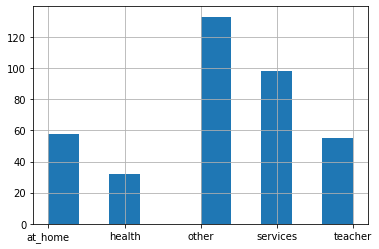

In [482]:
for col in ['Mjob']:
    histogr(col)
    describe(col)

В столбце не найдено ошибок, но есть пропуски. Заменим их на None.

In [483]:
for col in ['Mjob']:
    replace_None(col)
    nan_None(col)

### Fjob

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object


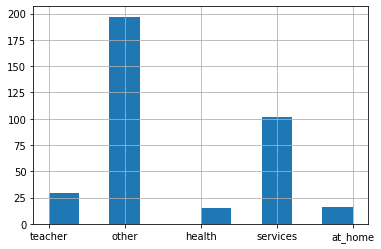

In [484]:
for col in ['Fjob']:
    histogr(col)
    describe(col)

Ошибок нет. Есть пропуски, заменим на None.

In [485]:
for col in ['Fjob']:
    replace_None(col)
    nan_None(col)

### reason

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object


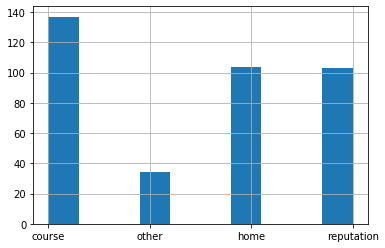

In [486]:
for col in ['reason']:
    histogr(col)
    describe(col)

Ошибок нет. Есть пропуски, заменим на None. Основная часть студентов выбрали школу из-за образовательной программы.

In [487]:
for col in ['reason']:
    replace_None(col)
    nan_None(col)

### guardian

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object
        guardian
mother       250
father        86
other         28


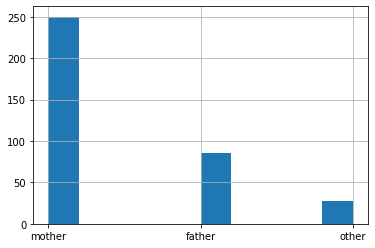

In [488]:
for col in ['guardian']:
    histogr(col)
    describe(col)
    counts(col)

Ошибок нет, есть пропуски. Заменим на None. У основной части студентов опекун мать.

In [489]:
for col in ['guardian']:
    replace_None(col)
    nan_None(col)

### traveltime

     traveltime
1.0         242
2.0          96
3.0          22
4.0           7


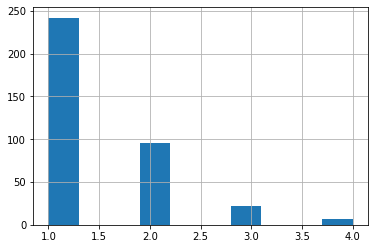

In [490]:
for col in ['traveltime']:
    histogr(col)
    counts(col)


Большей части студентов идти до школы меньше 15 минут. Ошибок нет, есть пустые значения. Заменим их. Также заменим nan на None.

In [491]:
for col in ['traveltime']:
    replace_None(col)

In [492]:
for col in ['traveltime']:
     nan_None(col)
     counts(col)

     traveltime
1.0         242
2.0          96
3.0          22
4.0           7


### studytime

     studytime
2.0        194
1.0        103
3.0         64
4.0         27


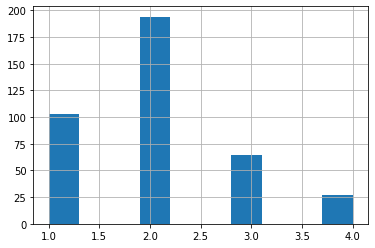

In [493]:
for col in ['studytime']:
    histogr(col)
    counts(col)

Ошибок нет, есть пропуски.

In [494]:
for col in ['studytime']:
    replace_None(col)
    nan_None(col)

### failures

     failures
0.0       293
1.0        49
2.0        16
3.0        15


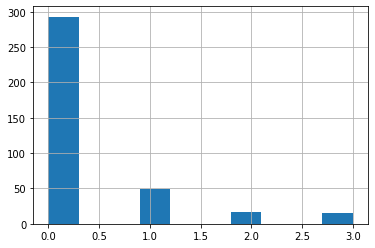

In [495]:
for col in ['failures']:
    counts(col)
    histogr(col)

Ощибок нет, есть пустые значения.

In [496]:
for col in ['failures']:
    replace_None(col)
    nan_None(col)

### schoolsup

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object


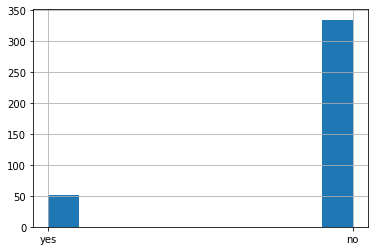

In [497]:
for col in ['schoolsup']:
    histogr(col)
    describe(col)

Ошибок нет, есть пустые значения. В основном у учеников нет дополнительной образовательной поддержки.

In [498]:
for col in ['schoolsup']:
    replace_None(col)
    nan_None(col)

### famsup

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object


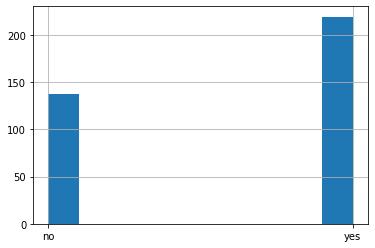

In [499]:
for col in ['famsup']:
    histogr(col)
    describe(col)

Ошибок нет, есть пустые значения. У большей части студентов есть семейная образовательная поддержка.

In [500]:
for col in ['famsup']:
    replace_None(col)
    nan_None(col)

### paid

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object


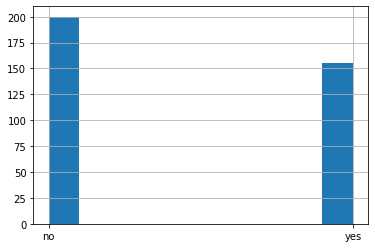

In [501]:
for col in ['paid']:
    histogr(col)
    describe(col)

Ошибок нет, есть множество пропущенных значений. Большая часть студентов не ходят на дополнителные платные занятия по математике.

In [502]:
for col in ['paid']:
    replace_None(col)
    nan_None(col)

### activities

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object


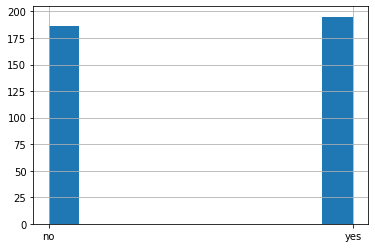

In [503]:
for col in ['activities']:
    histogr(col)
    describe(col)

Ошибок нет. Есть пустые значения. Практически одинаковое количество студентов как посещают, так и не посещают дополнительные внеучебные занятия.

In [504]:
for col in ['activities']:
    replace_None(col)
    nan_None(col)

### nursery

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object


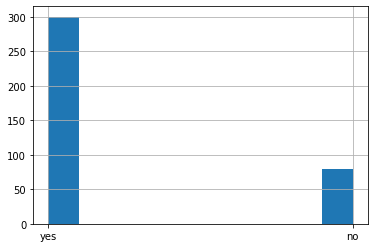

In [505]:
for col in ['nursery']:
    histogr(col)
    describe(col)

Основная часть студентов посещали детский сад. Ошибок нет. Есть пустые значения.

In [506]:
for col in ['nursery']:
    replace_None(col)
    nan_None(col)

### higher

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object


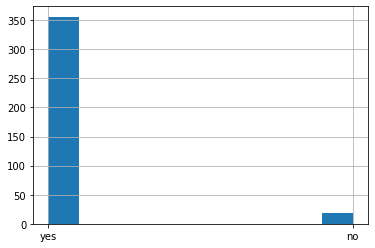

In [507]:
for col in ['higher']:
    histogr(col)
    describe(col)

Основная часть студенттов хотят получить высшее образование. Ошибок нет, есть пустые значения.

In [508]:
for col in ['higher']:
    replace_None(col)
    nan_None(col)

### internet

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object


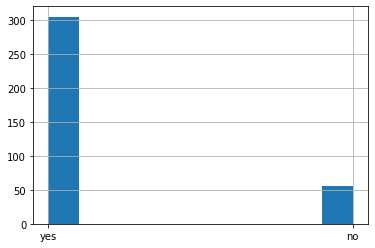

In [509]:
for col in ['internet']:
    histogr(col)
    describe(col)

Основная часть студентов имеют интернет. Ошибок нет, есть пустые значения. 

In [510]:
for col in ['internet']:
    replace_None(col)
    nan_None(col)

### romantic

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object


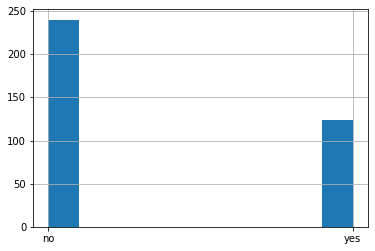

In [511]:
for col in ['romantic']:
    histogr(col)
    describe(col)

Большая часть студентов не имеют романтические отношения. Ошибок нет, есть пустые значения. 

In [512]:
for col in ['romantic']:
    replace_None(col)
    nan_None(col)

### famrel

      famrel
 4.0     182
 5.0      99
 3.0      62
 2.0      17
 1.0       7
-1.0       1


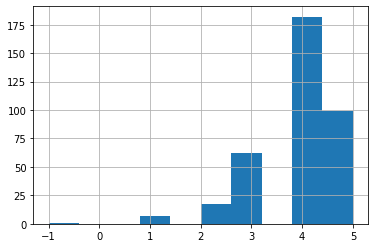

In [513]:
for col in ['famrel']:
    histogr(col)
    counts(col)

Имеется одно ошибочное значение -1. Вероятнее всего это опечатка, поэтому заменим данное значение на 1.

In [514]:
for col in ['famrel']:
    replace_value(col, -1.0, 1.0)
    counts(col)

     famrel
4.0     182
5.0      99
3.0      62
2.0      17
1.0       8


Теперь ошибок нет, но есть пропуски.

In [515]:
for col in ['famrel']:
    replace_None(col)
    nan_None(col)

### freetime

     freetime
3.0       153
4.0       112
2.0        63
5.0        38
1.0        18


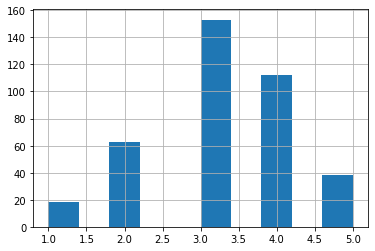

In [516]:
for col in ['freetime']:
    counts(col)
    histogr(col)

Ошибок нет, но есть пустые значения.

In [517]:
for col in ['freetime']:
    replace_None(col)
    nan_None(col)

### goout

     goout
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23


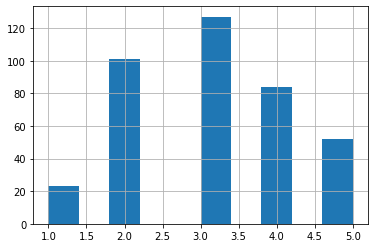

In [518]:
for col in ['goout']:
    counts(col)
    histogr(col)

Ошибок нет, есть пустые значения.

In [519]:
for col in ['goout']:
    replace_None(col)
    nan_None(col)

### health

     health
5.0     138
3.0      89
4.0      63
1.0      47
2.0      43


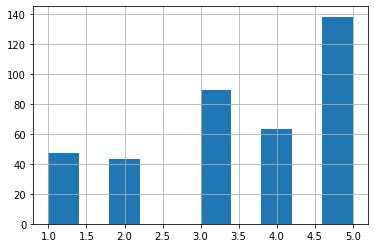

In [520]:
for col in ['health']:
    counts(col)
    histogr(col)

В основном у студентов очень хорошее здоровье. Ошибок нет, есть пустые значения.

In [521]:
for col in ['health']:
    replace_None(col)
    nan_None(col)

### absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


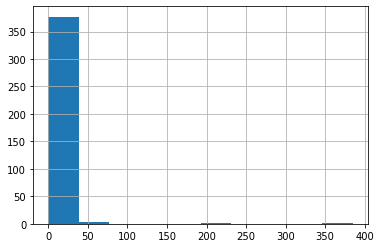

In [522]:
for col in ['absences']:
    histogr(col)
    describe(col)

В основном студенты не пропускают занятия, либо пропускают незначительно. Есть один студент, у которого 385 пропуском, что скорее всего является ошибкой. Отфильтруем данные. Воспользуемся формулой межквартильного размаха.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0 IQR:8.0, Границы выбросов:[-12.0, 20.0]


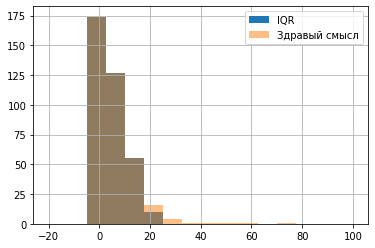

In [523]:
medisn=students.absences.median()
IQR=students.absences.quantile(0.75)-students.absences.quantile(0.25)
perc25=students.absences.quantile(0.25)
perc75=students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {}'.format(perc75), 'IQR:{},'.format(IQR), 'Границы выбросов:[{f}, {l}]'.format(f=perc25-1.5*IQR, l=perc75+1.5*IQR))
students.absences.loc[students.absences.between(perc25-1.5*IQR, perc75+1.5*IQR)].hist(bins=16,range=(-20,100), label='IQR')
students.absences.loc[students.absences<=400].hist(alpha=0.5, bins=16, range=(-20,100), label='Здравый смысл')
plt.legend()
plt.show()
#отфильтруем
students=students.loc[students.absences.between(perc25-1.5*IQR,perc75+1.5*IQR)]

      absences
0.0        111
2.0         60
4.0         53
6.0         31
8.0         21
10.0        17
12.0        12
14.0        12
3.0          8
16.0         7
7.0          6
18.0         5
5.0          5
20.0         4
1.0          3
9.0          3
11.0         2
13.0         2
15.0         2
19.0         1
17.0         1


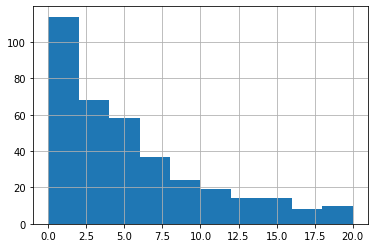

In [524]:
for col in ['absences']:
    histogr(col)
    counts(col)

Теперь данные не имеют выбросов. Но имеются пустые значения. Заполним их None.

In [525]:
for col in ['absences']:
    replace_None(col)
    nan_None(col)

### score

Теперь рассмотрим основной параметр. Так как этот параметр числовой, рассмотрим его распределение.

       score
50.0      53
55.0      42
0.0       36
75.0      31
65.0      30
60.0      29
70.0      27
40.0      26
45.0      23
80.0      16
30.0      14
35.0       9
90.0       9
25.0       7
95.0       5
85.0       3
100.0      1


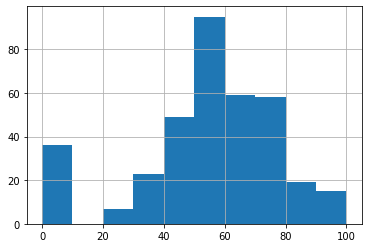

In [526]:
for col in ['score']:
    #describe(col)
    counts(col)
    histogr(col)


Как можно увидеть из данных, используется 100-бальная щкала оценивания. Небольшое количество студнтов получили от 0 до 10 баллов, что вполне возможно. Основная часть студентов получили от 50 до 60 баллов. Также есть один студент, который получил 100 баллов, что тоже вполне возможно.

В данных выбросов нет. Есть пропуски. Заменим их на None. Также nan заменим на None.

In [527]:
for col in ['score']:
    replace_None(col)
    nan_None(col)
    counts(col)

       score
50.0      53
55.0      42
0.0       36
75.0      31
65.0      30
60.0      29
70.0      27
40.0      26
45.0      23
80.0      16
30.0      14
35.0       9
90.0       9
25.0       7
95.0       5
85.0       3
100.0      1


## Работа с пропущенными значениями

Как можно было заметить из анализа каждого столбца, пустых значений в датасете много. Если удалить все строки со значением None, то останется мало данных. И это может привети к тому, что будет недостаточно данных для выявления какой-либо закономерности. Если каждый пропуск заменить модой, средним или медианой, то это может привести к тому, что модель будет давать ложную информацию. В среднем пропущенных значений в каждом столбце 10%. Поэтому принято решение в столбцах, где количество пропусков менее 10%, заменять None на моду. В противном случае удалять строку.

Удалим строки со значениями None в столбцах Pstatus, paid.

In [528]:
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,None,2.0,1.0,no,no,no,yes,yes,yes,None,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [529]:
students=students[~students['Pstatus'].isnull()]
students=students[~students['paid'].isnull()]
display(students)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,None,2.0,1.0,no,no,no,yes,yes,yes,None,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Остальные значения None заменим на моду.

In [530]:
None_Mode('address')
None_Mode('famsize')
None_Mode('Medu')
None_Mode('Fedu')
None_Mode('Mjob')
None_Mode('Fjob')
None_Mode('reason')
None_Mode('guardian')
None_Mode('traveltime')
None_Mode('studytime')
None_Mode('failures')
None_Mode('schoolsup')
None_Mode('famsup')
None_Mode('activities')
None_Mode('nursery')
None_Mode('higher')
None_Mode('internet')
None_Mode('romantic')
None_Mode('famrel')
None_Mode('freetime')
None_Mode('goout')
None_Mode('health')
None_Mode('absences')
None_Mode('score')
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [531]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      292 non-null    object
 1   sex         292 non-null    object
 2   age         292 non-null    int64 
 3   address     292 non-null    object
 4   famsize     292 non-null    object
 5   Pstatus     292 non-null    object
 6   Medu        292 non-null    object
 7   Fedu        292 non-null    object
 8   Mjob        292 non-null    object
 9   Fjob        292 non-null    object
 10  reason      292 non-null    object
 11  guardian    292 non-null    object
 12  traveltime  292 non-null    object
 13  studytime   292 non-null    object
 14  failures    292 non-null    object
 15  schoolsup   292 non-null    object
 16  famsup      292 non-null    object
 17  paid        292 non-null    object
 18  activities  292 non-null    object
 19  nursery     292 non-null    object
 20  higher    

Данные очищены. Пропуски либо заменены на моду, либо удалены.

## Часть 2. Корреляционный анализ

Поменяем тип некоторых числовых значений

In [547]:
#students = students.apply(pd.to_numeric)
#students[['absences', 'score']] = students[['absences', 'score']].apply(pd.to_numeric)

for col in ['absences']:
    to_numeric(col)
    
for col in ['score']:
    to_numeric(col)
    
for col in ['Fedu']:
    to_numeric(col)

for col in ['Medu']:
    to_numeric(col)

for col in ['traveltime']:
    to_numeric(col)
    
for col in ['studytime']:
    to_numeric(col)
    
for col in ['failures']:
    to_numeric(col)
    
for col in ['famrel']:
    to_numeric(col)
    
for col in ['freetime']:
    to_numeric(col)
    
for col in ['goout']:
    to_numeric(col)
    
for col in ['health']:
    to_numeric(col)
    
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      292 non-null    object 
 1   sex         292 non-null    object 
 2   age         292 non-null    int64  
 3   address     292 non-null    object 
 4   famsize     292 non-null    object 
 5   Pstatus     292 non-null    object 
 6   Medu        292 non-null    float64
 7   Fedu        292 non-null    float64
 8   Mjob        292 non-null    object 
 9   Fjob        292 non-null    object 
 10  reason      292 non-null    object 
 11  guardian    292 non-null    object 
 12  traveltime  292 non-null    float64
 13  studytime   292 non-null    float64
 14  failures    292 non-null    float64
 15  schoolsup   292 non-null    object 
 16  famsup      292 non-null    object 
 17  paid        292 non-null    object 
 18  activities  292 non-null    object 
 19  nursery     292 non-null    o

Исследуем матрицу корреляции

In [548]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.214276,-0.201643,0.162157,-0.045360,0.237376,0.046203,0.025926,0.103904,-0.034563,0.146781,-0.131347
Medu,-0.214276,1.000000,0.607480,-0.174829,0.098780,-0.249502,-0.020784,0.017665,0.040895,-0.088110,0.097984,0.223000
Fedu,-0.201643,0.607480,1.000000,-0.135166,-0.026818,-0.262333,-0.048782,-0.046857,0.053399,0.006322,0.014428,0.082589
traveltime,0.162157,-0.174829,-0.135166,1.000000,-0.077488,0.033861,0.016911,0.027772,-0.008662,-0.029324,0.014148,-0.088538
studytime,-0.045360,0.098780,-0.026818,-0.077488,1.000000,-0.168929,0.031819,-0.180051,-0.073524,-0.074847,-0.082829,0.112304
failures,0.237376,-0.249502,-0.262333,0.033861,-0.168929,1.000000,-0.010394,0.070294,0.034030,0.076289,0.049943,-0.343581
famrel,0.046203,-0.020784,-0.048782,0.016911,0.031819,-0.010394,1.000000,0.115477,0.104006,0.096648,-0.070531,0.068117
freetime,0.025926,0.017665,-0.046857,0.027772,-0.180051,0.070294,0.115477,1.000000,0.259408,0.050806,0.111074,0.078501
goout,0.103904,0.040895,0.053399,-0.008662,-0.073524,0.034030,0.104006,0.259408,1.000000,0.022982,0.132755,-0.087294
health,-0.034563,-0.088110,0.006322,-0.029324,-0.074847,0.076289,0.096648,0.050806,0.022982,1.000000,-0.012818,-0.070370


Полностью скоррелированных значений в таблице не найдено, но всеже наиболее скоррелированы параметры Fedu и Medu, что говорит о том, что в основном у студентов мать и отец имеют практический одинаковый уровень образования, поэтому удалим столбец Fedu, так как он наименее скоррелирован со значением score.



In [549]:
for col in ['Fedu']:
    delete_columns(col)

In [551]:
students.corr()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.214276,0.162157,-0.045360,0.237376,0.046203,0.025926,0.103904,-0.034563,0.146781,-0.131347
Medu,-0.214276,1.000000,-0.174829,0.098780,-0.249502,-0.020784,0.017665,0.040895,-0.088110,0.097984,0.223000
traveltime,0.162157,-0.174829,1.000000,-0.077488,0.033861,0.016911,0.027772,-0.008662,-0.029324,0.014148,-0.088538
studytime,-0.045360,0.098780,-0.077488,1.000000,-0.168929,0.031819,-0.180051,-0.073524,-0.074847,-0.082829,0.112304
failures,0.237376,-0.249502,0.033861,-0.168929,1.000000,-0.010394,0.070294,0.034030,0.076289,0.049943,-0.343581
famrel,0.046203,-0.020784,0.016911,0.031819,-0.010394,1.000000,0.115477,0.104006,0.096648,-0.070531,0.068117
freetime,0.025926,0.017665,0.027772,-0.180051,0.070294,0.115477,1.000000,0.259408,0.050806,0.111074,0.078501
goout,0.103904,0.040895,-0.008662,-0.073524,0.034030,0.104006,0.259408,1.000000,0.022982,0.132755,-0.087294
health,-0.034563,-0.088110,-0.029324,-0.074847,0.076289,0.096648,0.050806,0.022982,1.000000,-0.012818,-0.070370
absences,0.146781,0.097984,0.014148,-0.082829,0.049943,-0.070531,0.111074,0.132755,-0.012818,1.000000,0.109492


Теперь рассмотрим, как влияют различные параметры на баллы по экзамену. 

score имеет положительную корреляцию с Medu. Скорее всего у более умных и образованных родителей более умные дети.

Также score положительно скоррелирован со столбцом studytime. Он показывает, сколько времени студент уделяет на учебу школы. Соответственно, чем больше уделяет времени, тем лучше оценка.

Семейные отношения famrel также влияют на оценку, но меньше чем другие факторы. Чем лучше отношения в семье, тем лучше оценка.

Студенты, которые имеют больше свободного времени после школы, также хорошо сдают экзамен. Возможно потому, что имеют возможность отдохнуть от учебы.

Вызывает вопрос только то, что чем больше студент пропускает занятий, тем лучше оценка. Либо потому, что в датасете в данном столбце недостоверные данные. Либо в школе плохо учат математике, и студенты предпочитают ходить на какие-то дополнительные занятия, а не в школу.

Отрицательно скоррелированно количество баллов с возрастом школьников, что говорит о том, что возможно более молодые студенты имеют более гибкий ум. Либо в младших классах лучше преподают математику, чем в старших. Либо у более взрослых студентов появляютя романтические отношения, которые отрицательно влияют на учебу.

Также студенты, которым дольше идти до школы, хуже сдают экзамен. Но данный параметр влияет незначительно.

Также студенты, у которых больше веучебных неудач сдают экзамен хуже. И этот параметр достаточно сильно влияет. 

Время, проведенное с друзьями также отрицательно влияет на результат по экзамену.

И здоровье студента также влияет на оценку по экзамену.

Соответственно, наибольшее влияние на результат по экзамену оказывает возраст студента, образование родителей, время на учебу помимо школы, количество внеучебных неудач (данный параметр положительно коррелирует с возрастом) и количество пропущенных занятий. Столбцы, которые наименее коррелируемые удалим.


In [ ]:
for col in ['traveltime']:
    delete_columns(col)

for col in ['famrel']:
    delete_columns(col)
    
for col in ['freetime']:
    delete_columns(col)
    
for col in ['goout']:
    delete_columns(col)
    
for col in ['health']:
    delete_columns(col)

In [570]:
students.corr()


,age,Medu,studytime,failures,absences,score
age,1.000000,-0.214276,-0.045360,0.237376,0.146781,-0.131347
Medu,-0.214276,1.000000,0.098780,-0.249502,0.097984,0.223000
studytime,-0.045360,0.098780,1.000000,-0.168929,-0.082829,0.112304
failures,0.237376,-0.249502,-0.168929,1.000000,0.049943,-0.343581
absences,0.146781,0.097984,-0.082829,0.049943,1.000000,0.109492
score,-0.131347,0.223000,0.112304,-0.343581,0.109492,1.000000


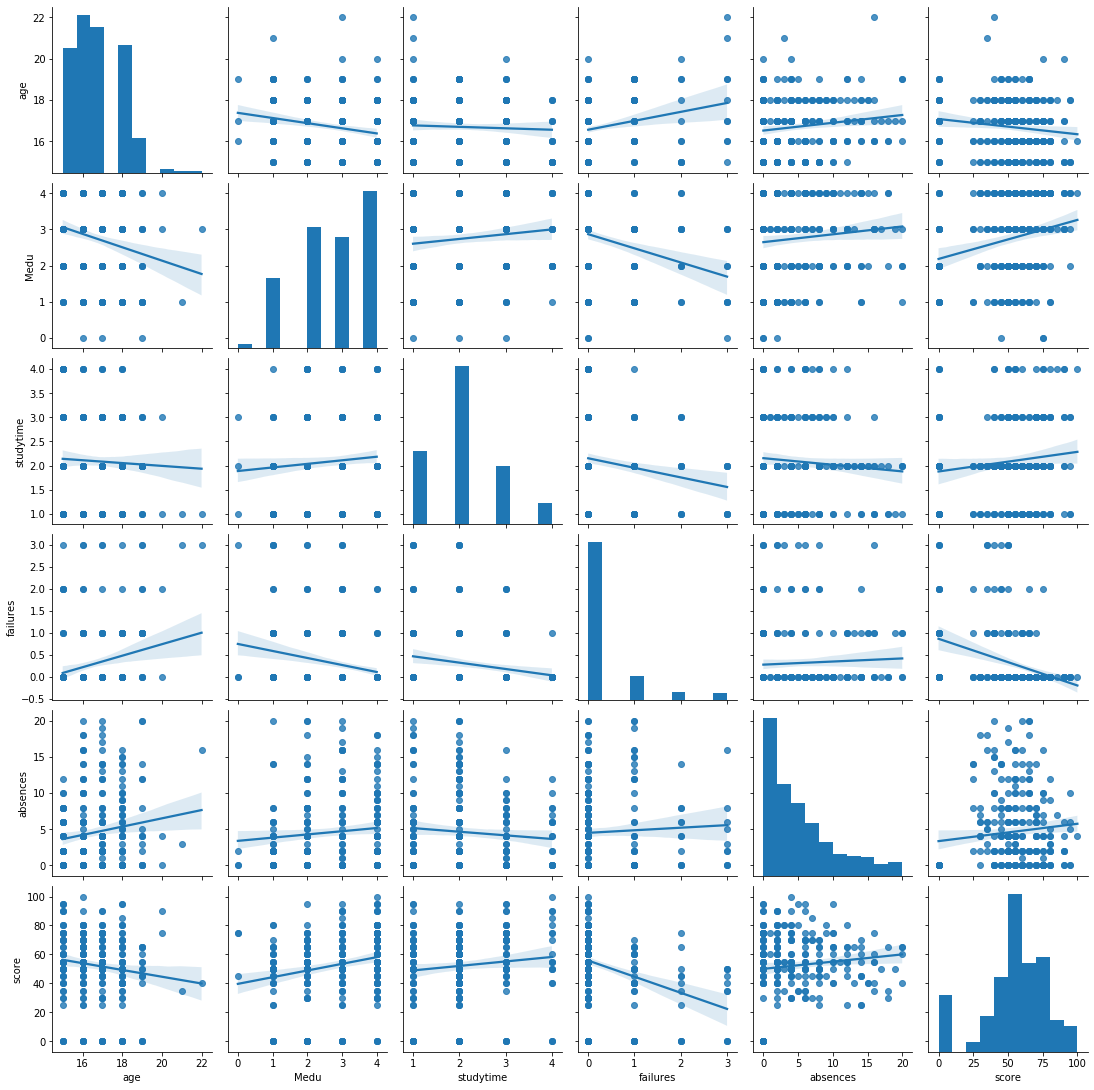

In [571]:
sns.pairplot(students, kind = 'reg')

## Анализ номинативных переменных

Для номинативных переменных использование корреляционного анализа нецелесообразно. Посмотрим, различается ли распределение рейтинга в зависимости от значений этих переменных. Параметны, которые осталось рассмотреть:

school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic

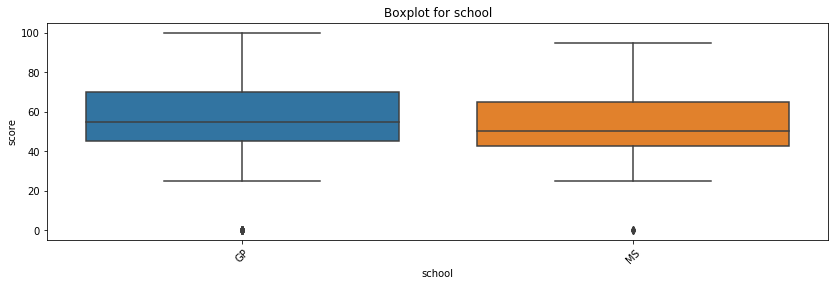

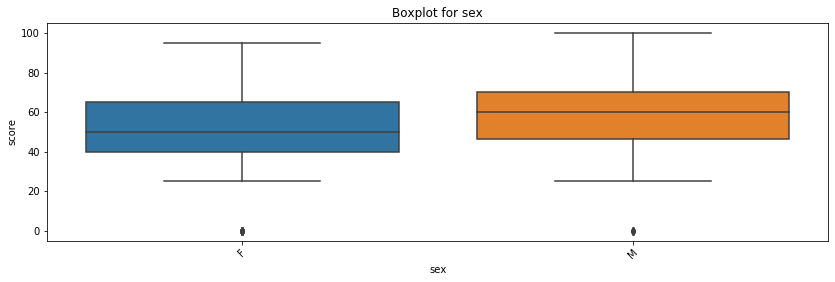

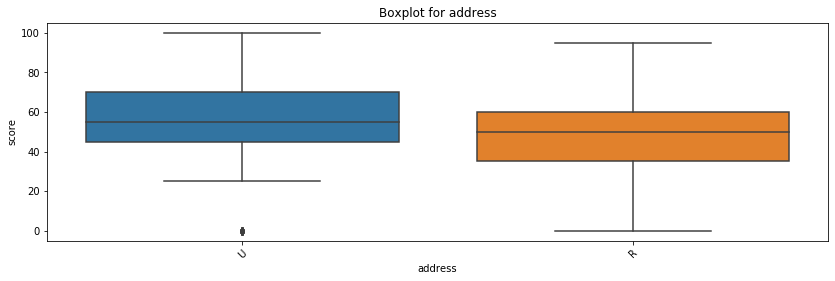

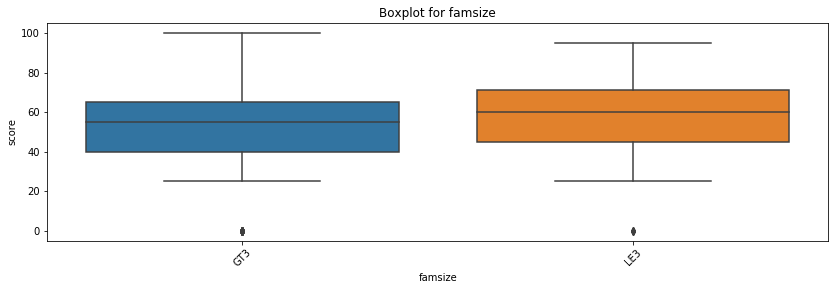

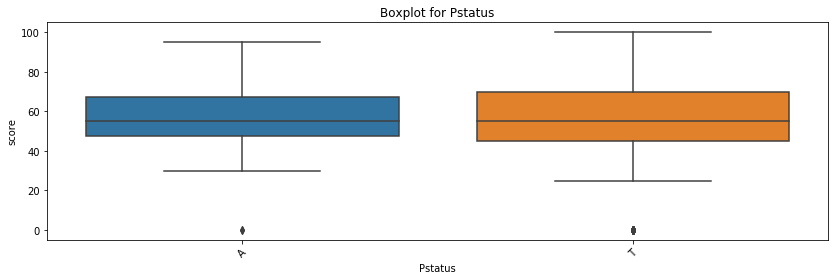

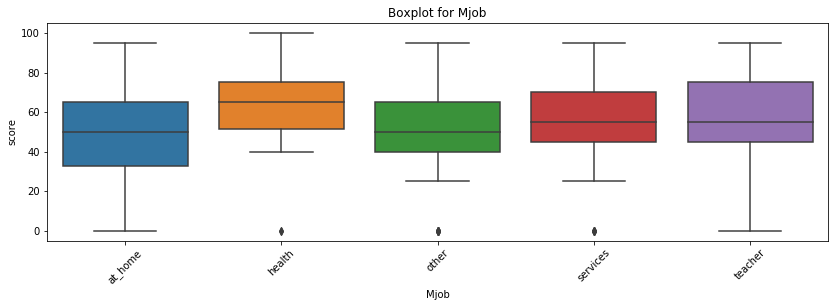

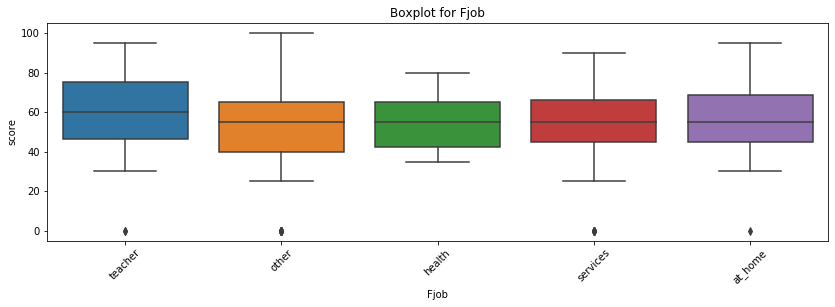

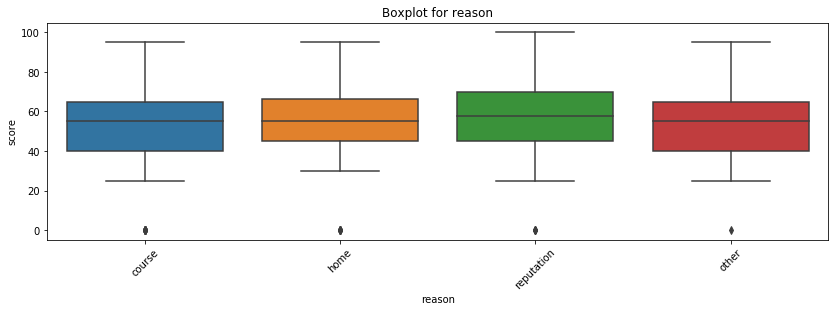

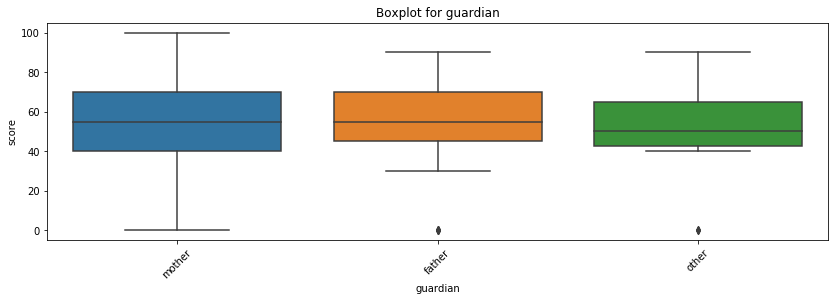

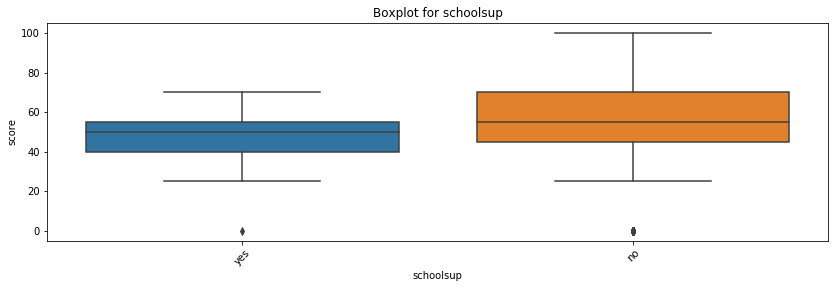

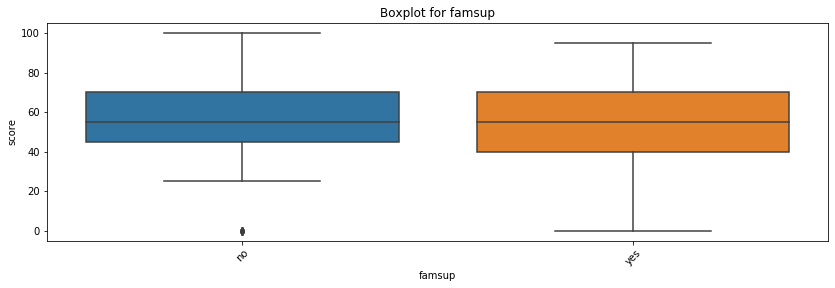

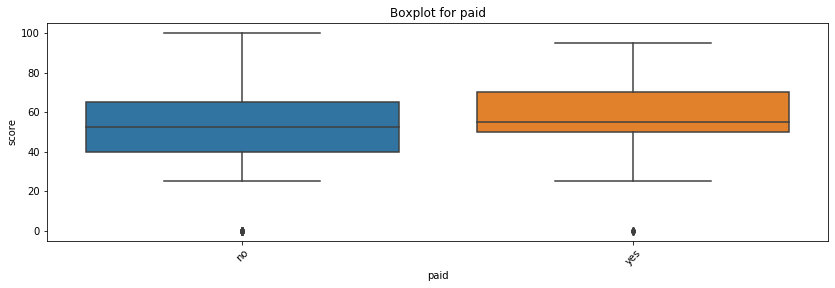

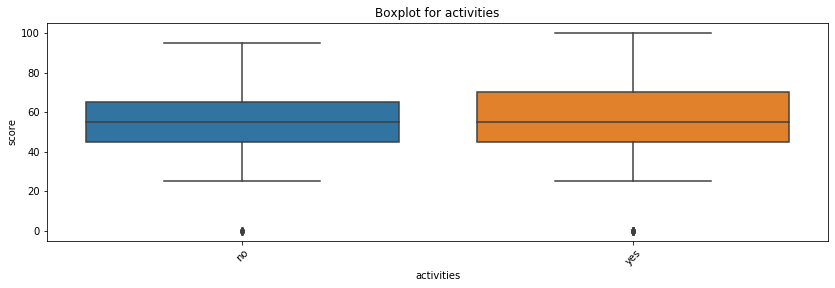

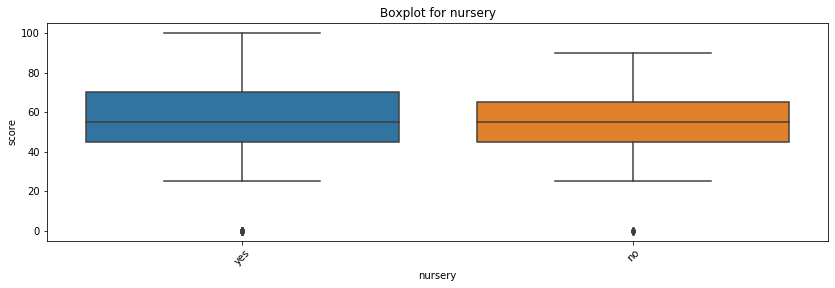

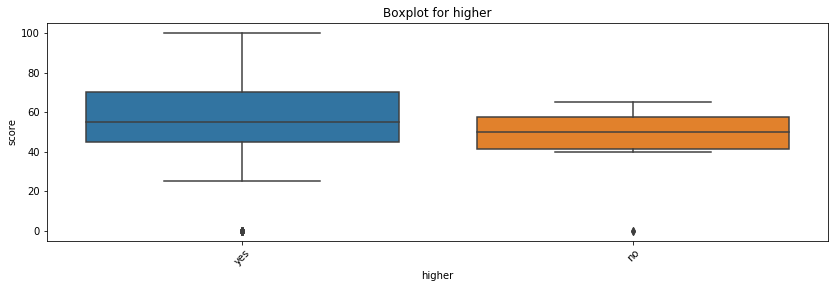

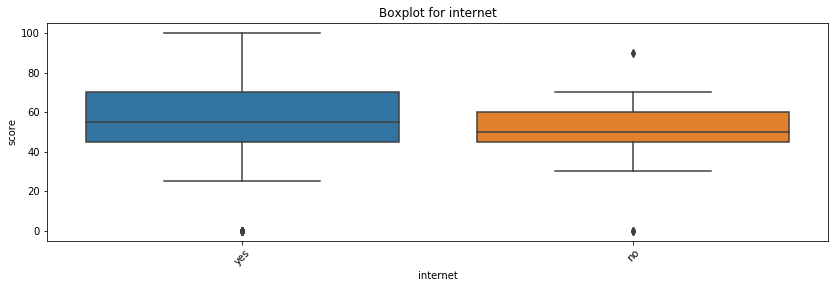

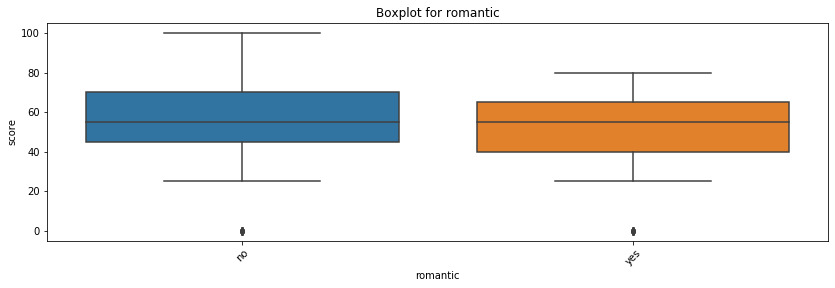

In [573]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Итак, из построенных графиков boxplot можно увидеть, что школа, в которой учится ученик влияет лишь немного. Удалим этот столбец.

Пол влияет на результат. Парни лучше сдают экзамен по математике, чнм девушки. Этот признак оставляем.

Немного хуже сдают студенты, которые живут за городом. Данный признак не будем удалять.

Студенты из многодетных семей немного хуже сдают экзамен. Оставим этот признак.

Студенты, у которых родители живут вместе, экзамен сдают немного лучше, но в целом на результат это особо не влияет. Удалим этот столбец.

Работа матери достаточно сильно влияет на то, как сдают студенты экзамен. Лучшие результаты показывают дети врачей, а худшие - дети домохозяек.

Работа отца влияет лишь только тогда, когда отец работает учителем. В остальных случаях практически не влияет. Удалим этот столбец.

Причина выбора школы особо не влияет, поэтому удалим этот столбец.

Также опекун не оказывает особого влияния на результат. Удалим столбец.

Студенты с дополнительной образовательной поддержкой хуже сдают экзамен, что вызывает вопросы.

Семейная образовательная поддержка практически не влияет на результат.Удалим столбец.

Студенты, которые ходят на дополнительные платные занятия по математике, сдают экзамен лучше.

Дополнительные внеучебные занятия также не сильно влияют на результат, по
тому удалим этот столбнц.

Факт, посещал ли студент детский сад, также практически не влияет на результаты по экзамену. Удалим столбец.

Студенты, которые хотят поступить в высшее учебное заведение, лучше сдают экзамен, видимо потому, что есть мотивация.

Студенты, у которых есть интернет, также намного лучше сдают экзамен.

Студенты, у которых имеются романтические отношения, сдают экзамен немного хуже, но особо это не влияет на результаты. Удалим этот столбец.




Прежде чем удалять столбцы, проверим, есть ли статистическая разница в распределении оценок по наминативным признакам, с помощью теста Стьюдента.

In [575]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [576]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid


Как видно, сильно различаются 3 параметра: sex, address, paid. Оставим эти переменные в датасете для дальнейшего построения модели. Удалим столбцы (по анализу boxplot) school, Pstatus, Fjob, reason, guardian, famsup, activities, nursery, romantic

In [577]:
for col in ['school']:
    delete_columns(col)

for col in ['Pstatus']:
    delete_columns(col)
    
for col in ['Fjob']:
    delete_columns(col)
    
for col in ['reason']:
    delete_columns(col)
    
for col in ['guardian']:
    delete_columns(col)
    
for col in ['famsup']:
    delete_columns(col)

for col in ['activities']:
    delete_columns(col)
    
for col in ['nursery']:
    delete_columns(col)
    
for col in ['romantic']:
    delete_columns(col)



In [578]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 394
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        292 non-null    object 
 1   age        292 non-null    int64  
 2   address    292 non-null    object 
 3   famsize    292 non-null    object 
 4   Medu       292 non-null    float64
 5   Mjob       292 non-null    object 
 6   studytime  292 non-null    float64
 7   failures   292 non-null    float64
 8   schoolsup  292 non-null    object 
 9   paid       292 non-null    object 
 10  higher     292 non-null    object 
 11  internet   292 non-null    object 
 12  absences   292 non-null    float64
 13  score      292 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 44.2+ KB


В итоге имеем датасет с 14 колонками.

## Выводы

1) В данном датасете было достаточно много пустых значений. Некоторые строки с пустыми значениями были удалены, некоторые заменены на моду.

2) Выбросы были замечены лишь только в столбце absences. Также были замечены некоторые ошибочные значения в датасете, которые были либо удалены, либо исправлены.

3) Было замечено, что у более образованных родителей дети лучше сдают экзамен по математике. Также из анализа видно, что более молодые ученики сдают лучше экзамен. Возможно это связано с тем, что более взрослые студенты больше сталкиваютя с внеучебными неудачами. А это влияет на результат. Вызывает вопросы столбец о количестве пропущенных занятий. Возможно, он имеет недостоверные результаты.Замечено, что парни лучше сдают экзамен по математике, чем днвушки. Студенты, которые живут в городе также лучше сдают экзамен. И положитльно влияют на оценку дополнительные платные занятия по математике.

4) Самые важные параметры, которые будем использовать в дальнейшем:

In [579]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 394
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        292 non-null    object 
 1   age        292 non-null    int64  
 2   address    292 non-null    object 
 3   famsize    292 non-null    object 
 4   Medu       292 non-null    float64
 5   Mjob       292 non-null    object 
 6   studytime  292 non-null    float64
 7   failures   292 non-null    float64
 8   schoolsup  292 non-null    object 
 9   paid       292 non-null    object 
 10  higher     292 non-null    object 
 11  internet   292 non-null    object 
 12  absences   292 non-null    float64
 13  score      292 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 44.2+ KB
